# TPC7
**Keyname:** TPC7

**Título:** Manipulação de base de dados

**Data de início:** 2021/11/26

**Data de finalização:** 2021/11/28

**Supervisor:** José Carlos Leite Ramalho, (www.di.uminho.pt/~jcr/)

**Autor:** Filipa Alexandra Cardoso Ribeiro

**Resumo:** Conclusão do trabalho desenvolvido na aula. Este aplicado à leitura e ao processamento de datasets, analisando e organizando a informação contida no mesmo.

## Dataset

Para a resolução dos exercícios desta ficha, descarrega o dataset de alunos do site da UC.

### Estrutura do dataset
O dataset tem a seguinte estrutura:

```
id_aluno,nome,curso,tpc1,tpc2,tpc3,tpc4
"a1","Aysha Melanie Gilberto","LEI",12,8,19,8
"a2","Igor André Cantanhede","ENGFIS",12,16,18,20
"a3","Laurénio Narciso","ENGFIS",8,14,15,14
"a4","Jasnoor Casegas","LCC",14,20,17,11
"a5","Tawseef Rebouças","ENGBIOM",13,14,13,17
"a6","Eryk Clementino","LEI",10,19,11,14
...
```

## Leitura (exercício 1)

Depois de pensares num modelo adequado especifica a função que lê o ficheiro e povoa esse modelo.

In [48]:
#BDAlunos=[Alunos]
#Aluno={id:"...", nome:"...", curso:"...", tpc:[int]}

def lerDataset(fnome):
    bd=[]
    f=open(fnome, encoding="utf-8")
    f.readline()
    for linha in f:
        novaLinha=linha.replace("/n", "")
        campos=novaLinha.split(",")
        aluno={}
        aluno["id"]=campos[0]
        aluno["nome"]=campos[1]
        aluno["curso"]=campos[2]
        listaTPC=[]
        for tpc in campos[3:]:
            listaTPC.append(int(tpc))
        aluno["tpc"]=listaTPC
        bd.append(aluno)
    return bd
lerDataset("alunos.csv")

## Listagem (exercício 2)

Especifica uma função que faça a listagem no monitor dos vários registos de informação.
Tenta dar a forma duma tabela em que as colunas têm todas a mesma dimensão.

In [43]:
def listarDataset(bd):
    print("  id   |    nome    |    curso    |     tpcs")
    print("---------------------------------------------")
    for a in bd:
        print(a["id"] + "|" + a["nome"] + "|" + a["curso"] + "|" + str(a["tpc"]))
listarDataset(lerDataset("alunos.csv"))

  id   |    nome    |    curso    |     tpcs
---------------------------------------------
"a1"|"Aysha Melanie Gilberto"|"LEI"|[12, 8, 19, 8]
"a2"|"Igor André Cantanhede"|"ENGFIS"|[12, 16, 18, 20]
"a3"|"Laurénio Narciso"|"ENGFIS"|[8, 14, 15, 14]
"a4"|"Jasnoor Casegas"|"LCC"|[14, 20, 17, 11]
"a5"|"Tawseef Rebouças"|"ENGBIOM"|[13, 14, 13, 17]
"a6"|"Eryk Clementino"|"LEI"|[10, 19, 11, 14]
"a7"|"Ianna Noivo"|"ENGBIOM"|[15, 15, 17, 16]
"a8"|"Ayla Thaissa Reina"|"ENGBIOM"|[12, 8, 8, 18]
"a9"|"Cássia Viviane Coitã"|"ENGFIS"|[19, 9, 14, 10]
"a10"|"Koby Vindima"|"LEI"|[9, 14, 20, 13]
"a11"|"Gustavo Martim Hernandez"|"ENGBIOM"|[11, 8, 14, 11]
"a12"|"Siddarta Beiriz"|"LEI"|[17, 10, 16, 16]
"a13"|"Daniela Patrícia Montes"|"ENGBIOM"|[15, 15, 18, 19]
"a14"|"Kaylla Pessego"|"LCC"|[10, 14, 17, 15]
"a15"|"Bianca Cristina Primitivo"|"ENGBIOM"|[16, 9, 18, 10]
"a16"|"Magna Galhardo"|"ENGFIS"|[20, 18, 9, 14]
"a17"|"Grace Isabel Patriarca"|"LCC"|[19, 13, 9, 10]
"a18"|"Saubhagya Buco"|"LEI"|[18, 18, 17, 8]
"

## Consulta de um registo (exercício 3)

Especifica uma função que, dado o id de um aluno, coloca a sua informação no monitor. Para além disso, indica também a média dos TPC realizados.

In [44]:
def consultarDataset(bd):
    resposta=input("Introduza o id do aluno (c/ parênteses):")
    encontrado=False
    for linha in bd:
        if  linha["id"] == resposta:
            print("  id   |    nome    |    curso    | média tpc")
            print("---------------------------------------------")
            print(linha["id"] + "|" + linha["nome"] + "|" + linha["curso"] + "|" + str(sum(linha["tpc"])/len(linha["tpc"])))
            encontrado=True
    if encontrado==False:
        print("Não existe nenhum aluno com esse id!")
consultarDataset(lerDataset("alunos.csv"))

Introduza o id do aluno (c/ parênteses):"a26"
  id   |    nome    |    curso    | média tpc
---------------------------------------------
"a26"|"Steve Devesa"|"ENGBIOM"|11.75


## Top 10 (exercício 4)

Especifica uma função que dá como resultado uma lista com os alunos com as 10 médias mais altas: id, nome, curso, média.

In [45]:
def top10(bd):
    listaMedia=[]
    for a in bd:
        a["tpc"]= sum(a["tpc"])/len(a["tpc"])
        listaMedia.append(a["tpc"])
        listaMedia.sort()
        listaMedia.reverse()
    n=0
    while(n<10):
        for a in bd:
            if listaMedia[n]==a["tpc"] and n<10:
                n=n+1
                print(a["id"] + "|" + a["nome"] + "|" + a["curso"] + "|" + str(a["tpc"]))              
top10(lerDataset("alunos.csv"))

"a47"|"Moisés João Cornelio"|"LEI"|18.0
"a80"|"Maria Carolina Josué"|"ENGFIS"|18.0
"a32"|"Ariane Sofia Foja"|"LEI"|17.5
"a74"|"Vânia Sofia Porfirio"|"ENGBIOM"|17.5
"a56"|"Hakeem Brazão"|"LEI"|17.25
"a84"|"Laudário Frasão"|"LCC"|17.0
"a13"|"Daniela Patrícia Montes"|"ENGBIOM"|16.75
"a41"|"Lachezar Rosas"|"ENGBIOM"|16.75
"a45"|"Imayame Hespanha"|"ENGFIS"|16.75
"a60"|"Mariana Catarina Ramalheira"|"ENGBIOM"|16.5


## Distribuição por curso (exercício 5)

Especifica uma função que dá como resultado uma lista de pares indicando quantos alunos há em cada curso.

In [46]:
def distribPorCurso(bd):
    distribuicao={}
    for a in bd:
        if a["curso"] in  distribuicao.keys():
            distribuicao[a["curso"]]=distribuicao[a["curso"]]+1
        else:
            distribuicao[a["curso"]]=1

    return distribuicao
distribPorCurso(lerDataset("alunos.csv"))

{'"LEI"': 23, '"ENGFIS"': 32, '"LCC"': 20, '"ENGBIOM"': 25}

## Distribuição por médias (exercício 6)

Especifica uma função que dá como resultado uma lista de pares, média e número de alunos com essa média (considera o valor inteiro da média).

In [47]:
def distribPorMedia(bd):
    for a in bd:
        a["tpc"]= str(sum(a["tpc"])/len(a["tpc"]))
    distribuicao={}
    for a in bd:
        if a["tpc"] in  distribuicao.keys():
            distribuicao[a["tpc"]]=distribuicao[a["tpc"]]+1
        else:
            distribuicao[a["tpc"]]=1
    return(distribuicao)
distribPorMedia(lerDataset("alunos.csv"))

{'11.75': 2,
 '16.5': 4,
 '12.75': 7,
 '15.5': 1,
 '14.25': 6,
 '13.5': 2,
 '15.75': 4,
 '11.5': 3,
 '13.0': 6,
 '14.0': 5,
 '11.0': 1,
 '14.75': 5,
 '16.75': 3,
 '13.25': 5,
 '15.25': 8,
 '13.75': 7,
 '12.25': 2,
 '16.0': 2,
 '17.5': 2,
 '12.5': 2,
 '15.0': 2,
 '16.25': 2,
 '18.0': 2,
 '12.0': 4,
 '9.75': 2,
 '14.5': 5,
 '17.25': 1,
 '11.25': 3,
 '10.75': 1,
 '17.0': 1}

# Gráficos

## Gráfico da distribuição por curso (exercício 7)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por curso.

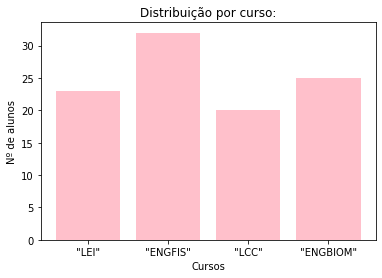

In [21]:
import matplotlib.pyplot as plt
def plotDistribPorCurso(distrib):
    cursos = distrib.keys()
    nAlunos = distrib.values()
    plt.xlabel("Cursos")
    plt.ylabel("Nº de alunos")
    plt.title("Distribuição por curso:")
    plt.bar(cursos,nAlunos, color="pink")
plotDistribPorCurso(distribPorCurso(lerDataset("alunos.csv")))

## Gráfico da distribuição por média (exercício 8)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por média.

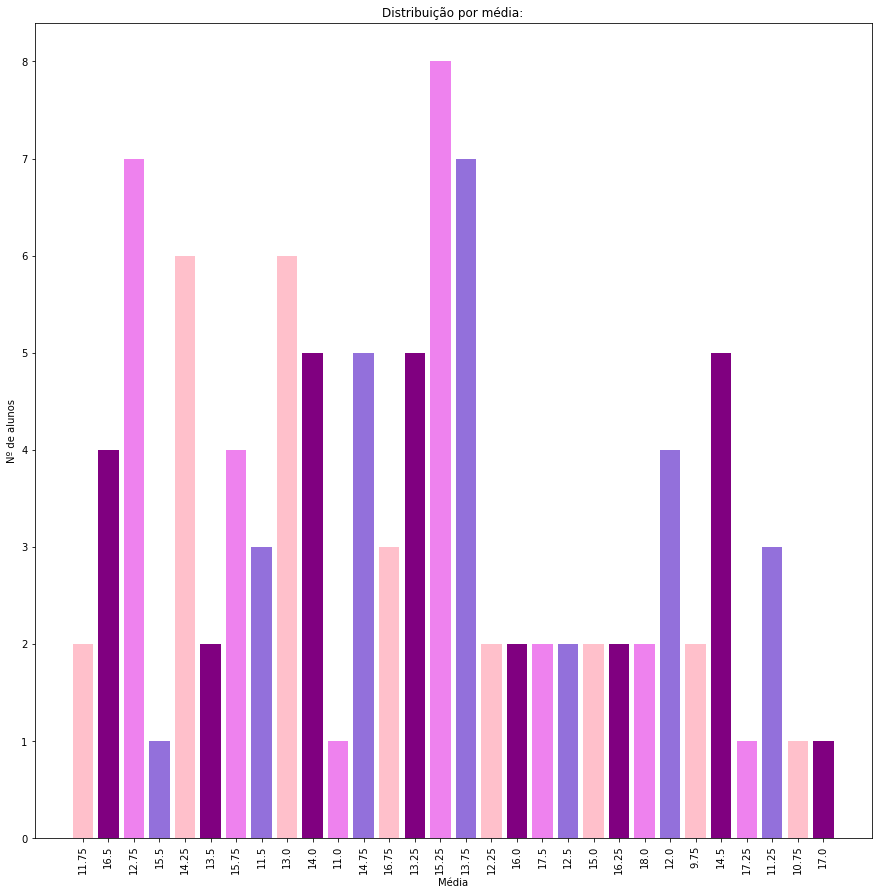

In [8]:
import matplotlib.pyplot as plt
def plotDistribPorMedia(distrib):
    media = distrib.keys()
    nAlunos = distrib.values()
    plt.figure(1, figsize=(len(media)/2, len(nAlunos)/2))
    plt.xlabel("Média")
    plt.ylabel("Nº de alunos")
    plt.title("Distribuição por média:")
    plt.bar(media,nAlunos,color = ['pink', 'purple', 'violet','mediumpurple'])
    plt.xticks(rotation=90)
    plt.show()
plotDistribPorMedia(distribPorMedia(lerDataset("alunos.csv")))